In [1]:
!pip install tensorflow_io
!pip install tensorflow_addons

     |████████████████████████████████| 23.4 MB 12.2 MB/s 
     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [4]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)      
cwd = f'{ROOT}/MyDrive/autoencoder'

/content/drive
Mounted at /content/drive


In [80]:
'''
This file uses the experimental tool published by tensorflow to load
tiff files

I expect the subset ot look like:
foldername:
        label1:
            img1
            img2
            img3 
            ...
        ...

I produce a list of all images in all files without labels:
[ tensor(img1), tensor(img2), ...]

'''
'''
Pads images now
'''
import pandas as pd
import tensorflow as tf
import numpy as np
import json
import tensorflow_io as tfio
import os
#import tf.image.ResizeMethod as ResizeMethod


class process_tiff_img_set():
    def __init__(self, ds_folder_name):
        
        self.folder = ds_folder_name
        self.df =  self.create_df()

    def pad_img(self, img):
      
      image_stack = img
        
      img_shape = tf.shape(image_stack)
      
      extra_top = int((8000-img_shape[0]))
      extra_bottom = 0

      
      extra_right = int((2000-img_shape[1]))
      extra_left = 0
      padded = np.pad(image_stack, ((extra_top, extra_bottom), (extra_left, extra_right), (0, 0)), mode='constant', constant_values=0) 
      return padded

    def decode_img(self, img):
        #print(f'decoding ... ')
        img = tfio.experimental.image.decode_tiff(img, index=0, name=None)[:, :, :3]
        #img_np = np.pad(img, (256, 256, 3))
        #tensor_img = tf.convert_to_tensor(a)   
        #print(tf.size(img))
        #print(tf.shape(img))
        # resize the image to the desired size
        img = self.pad_img(img)
        return img
        '''tf.image.resize_with_pad(
                img,
                256,
                256,
                method=tf.image.ResizeMethod.BILINEAR,
                antialias=False
            )'''


    def process_path(self, file_path):

        # load the raw data from the file as a string
        #print(f'reading {file_path}')
        img = tf.io.read_file(file_path)
        img = self.decode_img(img)

        return img

    def create_df(self):
        '''
        This function creates a dataframe with all labels and 
        images file paths
        I will use later to store numpy arrays
        '''
        cwd = f'/content/drive/MyDrive/autoencoder'
        ds = []
        DS_PATH = os.path.join(cwd, self.folder)
        labels = os.listdir(DS_PATH)
        for lbl in labels:
            cwd = os.path.join(DS_PATH, lbl)
            if(not os.path.isdir(cwd)):
                print(f'{cwd} is not a directory. Will not be in dict')
                continue
            images = os.listdir(cwd)
            for img in images:
                #convert to numpy matrix here
                if(img.split('.')[1] != 'tif'):
                    print(f'{img} is not a tiff file. Will not be in dict')
                    continue
                path = os.path.join(cwd, img)

                #changes
                img_np = self.process_path(path) #Tensor 
                ds.append(img_np)

        
        return ds
  
    def get_tensor(self):
        return (self.df)


    def __str__(self):
        obj_str = ""
        for i, obj in enumerate(self.df):
            obj_str += f'{i}: {str(obj)},\n'
        return f'<process_tiff_img_set>:\n{obj_str}'




In [ ]:
x_train = process_tiff_img_set("subset1")
x_train = x_train.get_tensor()


x_test = process_tiff_img_set('subset2')
x_test = x_test.get_tensor()

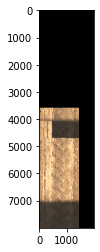

In [82]:
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'black'
plt.imshow(x_train[0])

In [76]:
import numpy as np
def pad_imgs(x_train=[]):
  for img in x_train:
    print(f'------------------------')
    image_stack = img
    
    img_shape = tf.shape(image_stack)
    print(f'curr img.shape = {img_shape}')

    if(img_shape[0] < 8000):
      extra_top = int((8000-img_shape[0]))
      extra_bottom = 0

    if(img_shape[1] < 2000):
      extra_right = int((2000-img_shape[1]))
      extra_left = 0
    print(f'expected new dimensions ({img_shape[0]+extra_top+extra_bottom}, {img_shape[1]+extra_left+extra_right} ,3)')
    padded = np.pad(image_stack, ((extra_top, extra_bottom), (extra_left, extra_right), (0, 0)), mode='constant', constant_values=0) 
    print(f'padded.shape = {np.shape(padded)}')

pad_imgs(x_train)


------------------------
curr img.shape = [4415 1465    3]
expected new dimensions (8000, 2000 ,3)
padded.shape = (8000, 2000, 3)
------------------------
curr img.shape = [7489 1476    3]
expected new dimensions (8000, 2000 ,3)
padded.shape = (8000, 2000, 3)
------------------------
curr img.shape = [4497 1467    3]
expected new dimensions (8000, 2000 ,3)
padded.shape = (8000, 2000, 3)
------------------------
curr img.shape = [4547 1465    3]
expected new dimensions (8000, 2000 ,3)
padded.shape = (8000, 2000, 3)
------------------------
curr img.shape = [4550 1463    3]
expected new dimensions (8000, 2000 ,3)
padded.shape = (8000, 2000, 3)
------------------------
curr img.shape = [4394 1465    3]
expected new dimensions (8000, 2000 ,3)
padded.shape = (8000, 2000, 3)
------------------------
curr img.shape = [4412 1467    3]
expected new dimensions (8000, 2000 ,3)
padded.shape = (8000, 2000, 3)
------------------------
curr img.shape = [4490 1465    3]
expected new dimensions (8000, 